Import libraries

In [169]:
import math
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.opflow import X, Y, Z, I, CircuitStateFn
from qiskit.visualization import plot_histogram
pi = math.pi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple


Simple test of calculation of expectation value of the truncated $N=2$ deuteron Hamiltonian

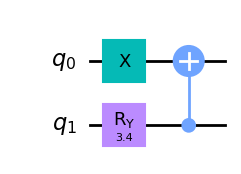

In [170]:
# Define deuteron Hamiltonian
Hamilt_1 = (0.218291 * Z^I) - (0.218291 * I^I)
Hamilt_2 = (5.906709 * I^I) + (0.218291 * Z^I) - (6.125 * I^Z) - (2.143304 * X^X) - (2.143304 * Y^Y)

# Loop over variational parameter
theta = np.arange(-2.9,+3.5,0.1)
exp_val = np.empty(len(theta))
for k in range(0, len(theta)):
    # Create a Quantum Circuit acting on the q register, default both in the state |0>
    circuit = QuantumCircuit(2)

    # Add X gate to qubit 0
    circuit.x(0)

    # Unitary gate parameters
    th= theta[k]

    # Controlled unitary gate (rotation around y axis) on qubit 1
    circuit.ry(th, 1)

    # Add CNOT
    circuit.cx(1,0)

    # Initialize state
    state= Statevector.from_int(0, 4)

    # Evolve the state by the quantum circuit
    state = state.evolve(circuit)
    #draw using latex
    state.draw('latex')
    exp_val[k]=state.expectation_value(Hamilt_2).real
    #print('Expectation value: ', exp_val[k], 'MeV')


# Map the quantum measurement to the classical bits
#circuit.measure([0, 1], [0, 1])

# Compile the circuit for the support instruction set (basis_gates)
# and topology (coupling_map) of the backend
#compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the aer simulator
#job = simulator.run(compiled_circuit, shots=10000)

# Grab results from the job
#result = job.result()

# Returns counts
#counts = result.get_counts(compiled_circuit)
#print("\nTotal count for 00 and 11 are:", counts)


# Draw the circuit
circuit.draw('mpl')



Lowest trial energy:  -1.7405935668994987 MeV


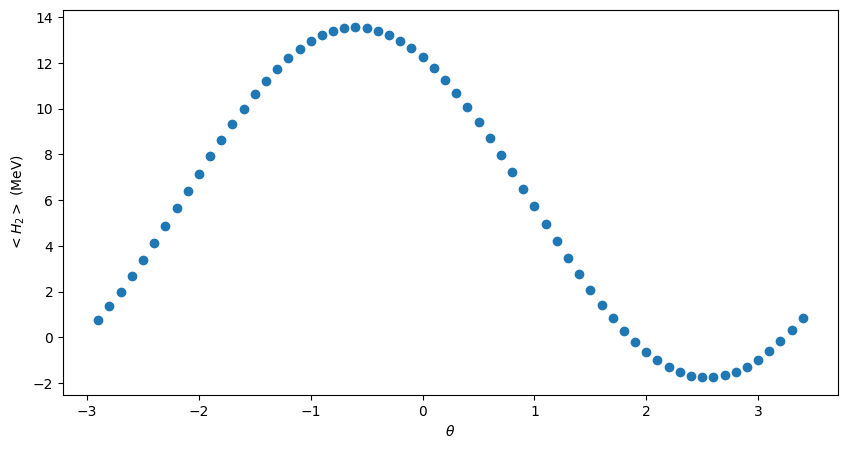

In [171]:
# Plot style options
w = 10
h = 5
fontsize = 12
cmap = plt.get_cmap('tab20')

# z(t)
plt.figure(figsize=(w,h))

plt.scatter(theta, exp_val)

plt.xlabel("$\\theta$")
plt.ylabel("$<H_2>$ (MeV)")

print('Lowest trial energy: ', min(exp_val), 'MeV')